<a href="https://colab.research.google.com/github/ManikGo/Projects/blob/master/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison Of Different Classification Techniques Using Iris Dataset

Iris is a flowering plant with showy flowers.The iris dataset has four attributes namely:

1.   sepal length
2.   sepal width

1.   petal length
2.   petal width

**Species (Iris-setosa, Iris-versicolor, Iris-virginica)**











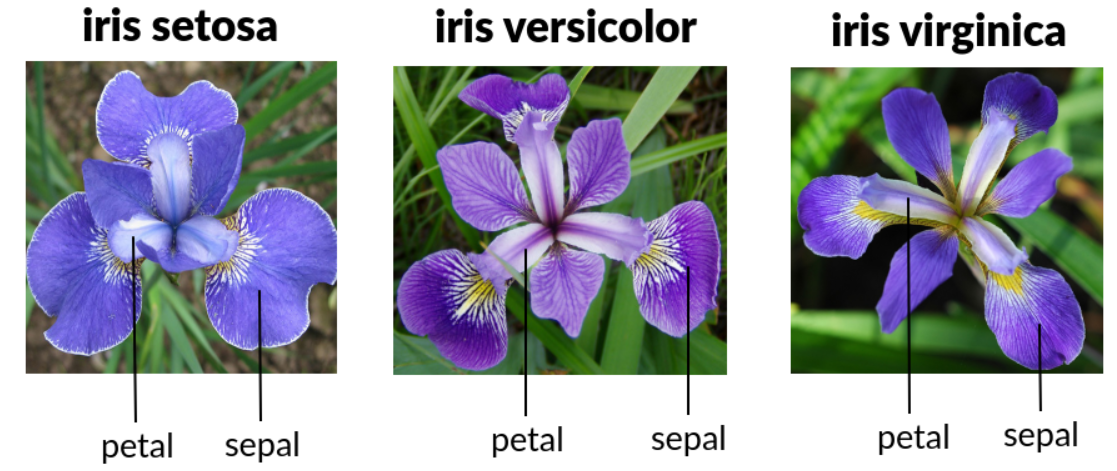

This Project is thorugh application of machine learning with python programming. It focuses on IRIS flower classification using Machine Learning with scikit tools. Here some of algorithm are used that are some types of machine learning subparts algorithms of supervised and Unsupervised learning. Algorithm used for predicting and get accuracy are -

  1. K nearest classifier 
  2. Dicision tree classifier
  3. Logistic Regression
  4. SVM 

In [238]:
# Data processing
import pandas as pd      # we can do data processing by using it(csv to tabular form).
import numpy as np       # numpy(numerical python)- We can do mathematical operations by using this.

# Visualisation, It enables the drawing of matplotlib figures in the IPython environment.
import matplotlib.pyplot as plt
%matplotlib inline 

In [239]:
path='/content/drive/MyDrive/Iris.csv'

In [240]:
# Read Dataset
iris=pd.read_csv(path) 

In [241]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **Note**
1. Here Species is taken as lable.
2. If we will get some data on 151th position then we have to classify that where it is belongs to(setosa, virginica or versicolor)

# Drop Column ID

In [242]:
iris.drop(columns='Id', inplace=True) #We use inplace to remove permanantly

In [243]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Identify the shape of dataset

In [244]:
iris.shape #here (rows, column)

(150, 5)

# Get the list of Column

In [245]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Missing Values
    Pandas dataframe.isna() function is used to detect missing values or we can use dataframe.isnull() function both are same.

In [246]:
iris.isna().values.any()

False

# Identify duplicate enteries
To find duplicates, we can simply call duplicated() method on the column.

In [247]:
iris[iris.duplicated(keep=False)] #show all rows with duplicates

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [248]:
iris[iris.duplicated()] #show only secondary  duplicates rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [249]:
iris.duplicated().value_counts() #count the number of duplicate data

False    147
True       3
dtype: int64

# Iris Dataset: Data Visualisation

In [250]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # data visualization
%matplotlib inline 

# Heatmap

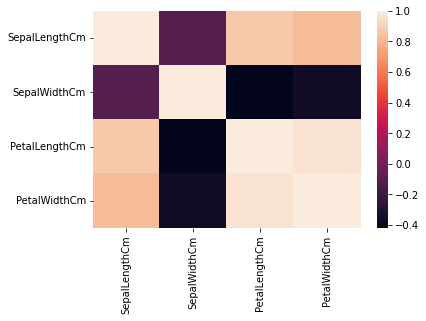

In [251]:
sns.heatmap(data=iris.corr())

#Bar Plot

In [252]:
iris['Species'].value_counts() # count the number of each Species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

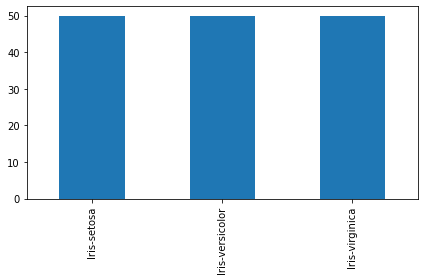

In [253]:
iris['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

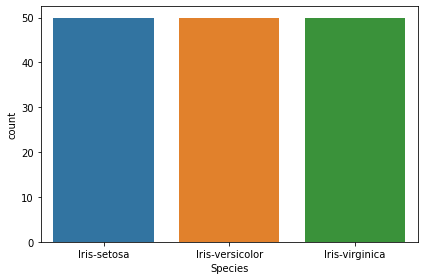

In [254]:
sns.countplot(data=iris, x='Species')
plt.tight_layout()         # Differentiating through colors, we use seaborn library

#Pai Chart

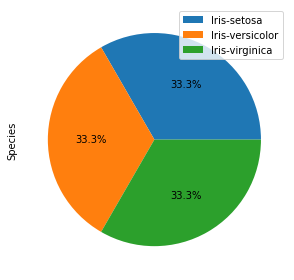

In [255]:
iris['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

#Scatter Plot

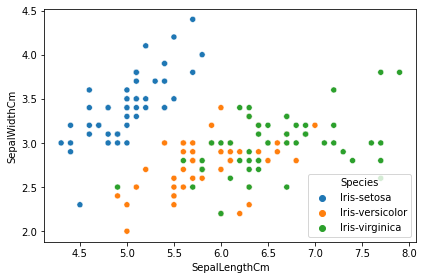

In [256]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species') 
plt.tight_layout()

# *Observation*
By taking parameters(Sepal Length, Sepal Width) we can distinguish the Iris-setosa.

# **NOTE**
By the use of scateer plot, we have change the parameters(Sepal Length, Sepal Width, petal Length, Petal Width) again and again so to overcome this now we use **Pair Plot**.

#Pair Plot

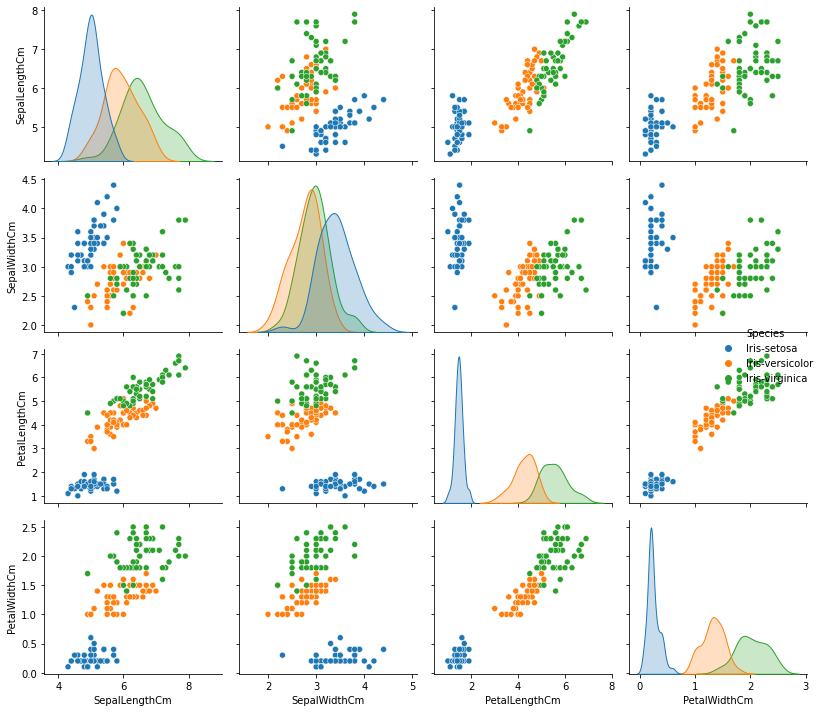

In [257]:
sns.pairplot(iris, hue='Species')
plt.tight_layout()

# *Observations*
1. Using Sepal_Lenght & Sepal_Width features, we can only distinguish Setosa flower from others.
2. Seperating Versicolor & Virginica is much harder as they have considerable overlap.
3. Hence, Sepal_Lenght & Sepal_Width features only work well for Setosa.
4. Using Sepal_Lenght & Petal_Width features, we can distinguish all of them with some minor error.

#Classification Models
    **Dataset  will be divided into 2 sets**

1.   Training Set
2.   Testing Set



In [258]:
from sklearn.model_selection import train_test_split  # by the use of "train_test_split" we can divide the dataset into 2 parts(Training Set, Testing Set) 

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluation of model performance

In [259]:
x = iris.drop(columns='Species') # assign features to variable X
x.head(10)                       # Displays the first 10 lines

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [260]:
y = iris['Species'] # assign class label (target) to the variable y
y.head(10)          # show first 10 lines

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

#Split the dataset into testing and training set

**Why we use random_state?**

With random_state=42, we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0 

In [261]:
# i am going to testing on 33% data and training on 67% data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 
                                                      
print('training dataset')
print(x_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(x_test.shape)
print(y_test.shape)

training dataset
(100, 4)
(100,)

testing dataset:
(50, 4)
(50,)


# **K-Nearest Neighbour**
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

**Why do we need a K-NN Algorithm?**

Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram
    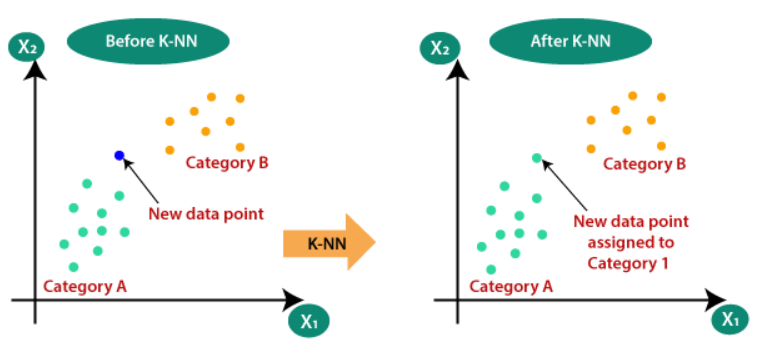

In [262]:
from sklearn.neighbors import KNeighborsClassifier

In [263]:
k_range = list(range(1,26))
scores = []     # for what value of k Accuracy is good
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # Algorithm Configuration
    model_knn.fit(x_train, y_train)                 # training model/classifier
    y_pred = model_knn.predict(x_test)              # Make Predictions on x_test
    scores.append(accuracy_score(y_test, y_pred))   # evaluation (Comparison between predictable data and actual data)

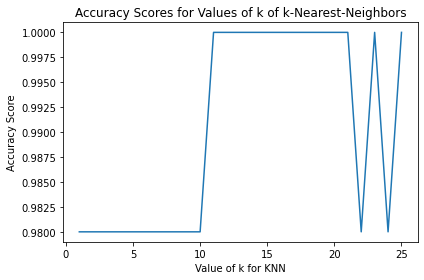

In [264]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [265]:
# to increase accuracy
model_knn = KNeighborsClassifier(n_neighbors=3) # Create KNN classifier
  #this means that if at least 2 out of the 3 nearest points to an new data point are same then a new data point is labeled with by majority from the 3 nearest points.

model_knn.fit(x_train,y_train)                  # training model/classifier
y_pred = model_knn.predict(x_test)              #  Make Predictions

In [266]:
print(accuracy_score(y_test, y_pred)) # Accuracy Score

0.98


In [267]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [268]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


# **Decision Tree Classifier**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.

**Why use Decision Trees?**

There are various algorithms in Machine learning, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating a machine learning model. Below are the two reasons for using the Decision tree:

1. Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
2. The logic behind the decision tree can be easily understood because it shows a tree-like structure.

In [269]:
from sklearn.tree import DecisionTreeClassifier

In [270]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred = model_dt.predict(x_test)

In [271]:
print(accuracy_score(y_test, y_pred)) # Accuracy Score

0.98


In [272]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [273]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


# **LogisticRegression**

In [274]:
from sklearn.linear_model import LogisticRegression

In [275]:
#model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(x_train,y_train)
y_pred = model_logreg.predict(x_test)

In [276]:
print(accuracy_score(y_test, y_pred))

1.0


In [277]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [278]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


# **Support Vector Classifier**

In [279]:
from sklearn.svm import SVC

In [280]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(x_train,y_train)
y_pred = model_svc.predict(x_test)

In [281]:
print(accuracy_score(y_test, y_pred))

1.0


In [282]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [283]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


# **Accuracy comparision for various models**

In [284]:
models = [model_knn, model_dt, model_logreg, model_svc]
accuracy_scores = []
for model in models:
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
# 'KNN'- 'dt' - 'logreg' -   'SVC'
print(accuracy_scores)

[0.98, 0.98, 1.0, 1.0]
